In [8]:
import numpy as np
import pandas as pd
import seaborn as sns 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("covid_19_data.csv")

In [9]:
data.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [10]:
data.shape

(109382, 8)

In [11]:
data=data.drop(['SNo','Last Update'],axis=1)

In [12]:
data = data.rename(columns={'Country/Region': 'Country', 'ObservationDate':'Date'})

Date                  0
Province/State    33673
Country               0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


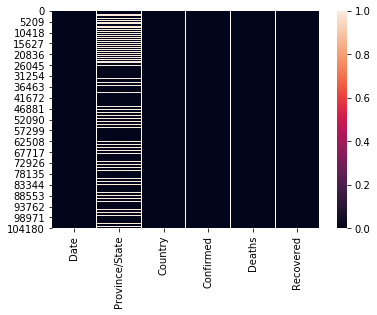

In [13]:
print(data.isnull().sum())
sns.heatmap(data.isnull())

In [14]:
data=data.drop(['Country','Province/State'],axis=1)

In [15]:
data.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

Confirmed


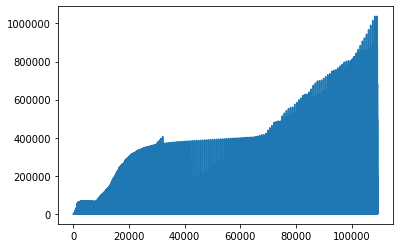

Deaths


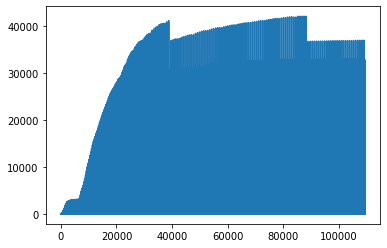

Recovered


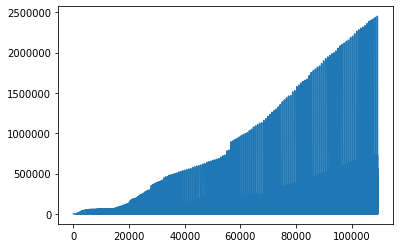

In [16]:
z=['Confirmed', 'Deaths', 'Recovered']
for i in z:
    print(i)
    plt.plot(data[i])
    plt.show()

In [17]:
df=data[['Date','Confirmed']]
df=df.set_index("Date")
df.index=pd.to_datetime(df.index)

df = df.resample('D').sum()
df

,Confirmed
Date,
2020-01-22,555.0
2020-01-23,653.0
2020-01-24,941.0
2020-01-25,1438.0
2020-01-26,2118.0
...,...
2020-09-09,27863733.0
2020-09-10,28161885.0
2020-09-11,28481413.0


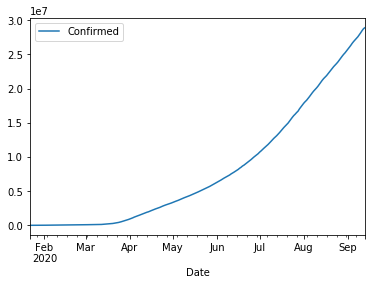

In [18]:
df.plot()

In [19]:
dataset = df.values
dataset = dataset.astype('float32')
dataset[:10]

array([[ 555.],
       [ 653.],
       [ 941.],
       [1438.],
       [2118.],
       [2927.],
       [5578.],
       [6165.],
       [8235.],
       [9925.]], dtype=float32)

In [20]:
dataset.shape

(236, 1)

In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

177 59


In [22]:
#We can write a simple function to convert our single column of data into a two-column dataset:
#the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count
#, to be predicted.
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
88/88 - 0s - loss: 165718326771712.0000
Epoch 2/200
88/88 - 0s - loss: 136544434257920.0000
Epoch 3/200
88/88 - 0s - loss: 115089562664960.0000
Epoch 4/200
88/88 - 0s - loss: 98186089725952.0000
Epoch 5/200
88/88 - 0s - loss: 84914263293952.0000
Epoch 6/200
88/88 - 0s - loss: 74334634770432.0000
Epoch 7/200
88/88 - 0s - loss: 65835251007488.0000
Epoch 8/200
88/88 - 0s - loss: 58940243050496.0000
Epoch 9/200
88/88 - 0s - loss: 53313823309824.0000
Epoch 10/200
88/88 - 0s - loss: 48716417335296.0000
Epoch 11/200
88/88 - 0s - loss: 44799050645504.0000
Epoch 12/200
88/88 - 0s - loss: 41476931190784.0000
Epoch 13/200
88/88 - 0s - loss: 38517161852928.0000
Epoch 14/200
88/88 - 0s - loss: 35868089778176.0000
Epoch 15/200
88/88 - 0s - loss: 33353531129856.0000
Epoch 16/200
88/88 - 0s - loss: 30934250291200.0000
Epoch 17/200
88/88 - 0s - loss: 28496625664000.0000
Epoch 18/200
88/88 - 0s - loss: 25912003264512.0000
Epoch 19/200
88/88 - 0s - loss: 23180282429440.0000
Epoch 20/200
88/88

Epoch 171/200
88/88 - 0s - loss: 743385984.0000
Epoch 172/200
88/88 - 0s - loss: 677918720.0000
Epoch 173/200
88/88 - 0s - loss: 734878784.0000
Epoch 174/200
88/88 - 0s - loss: 742430080.0000
Epoch 175/200
88/88 - 0s - loss: 753956544.0000
Epoch 176/200
88/88 - 0s - loss: 700328576.0000
Epoch 177/200
88/88 - 0s - loss: 696244480.0000
Epoch 178/200
88/88 - 0s - loss: 899847680.0000
Epoch 179/200
88/88 - 0s - loss: 669650240.0000
Epoch 180/200
88/88 - 0s - loss: 679877248.0000
Epoch 181/200
88/88 - 0s - loss: 676793920.0000
Epoch 182/200
88/88 - 0s - loss: 664663040.0000
Epoch 183/200
88/88 - 0s - loss: 685880832.0000
Epoch 184/200
88/88 - 0s - loss: 666763904.0000
Epoch 185/200
88/88 - 0s - loss: 788503104.0000
Epoch 186/200
88/88 - 0s - loss: 665798784.0000
Epoch 187/200
88/88 - 0s - loss: 722024704.0000
Epoch 188/200
88/88 - 0s - loss: 717490496.0000
Epoch 189/200
88/88 - 0s - loss: 806215744.0000
Epoch 190/200
88/88 - 0s - loss: 664934080.0000
Epoch 191/200
88/88 - 0s - loss: 6918652

In [25]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 630101376.00 MSE (25101.82 RMSE)
Test Score: 24061718528.00 MSE (155118.40 RMSE)


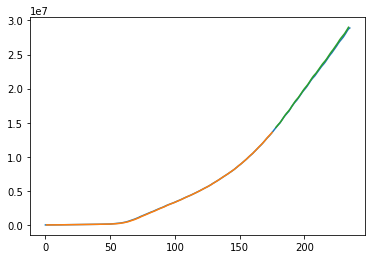

In [26]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()